## HW7 S23 - Starter Code

## Q1: NFL Regression

In [1]:
using DataFrames, DelimitedFiles
using PyPlot, JuMP, HiGHS, Ipopt

In [2]:
teams = [ "49ers", "falcons", "ravens", "steelers", "bears", "vikings", "lions", "saints", "bucs", "patriots", "jets", "packers", "chargers", "raiders", "cardinals", "giants", "panthers", "redskins", "jaguars", "browns", "colts", "chiefs", "eagles", "cowboys", "seahawks", "dolphins","titans", "bills", "broncos", "rams", "bengals" ]
teamIDs = Dict( zip( teams, Array(1:31) ) )
data = readdlm( joinpath(@__DIR__, "nfl.inc" ), header=false)
results_table=Array{Int16,2}(undef, size(data,1),4)
for i in 1:size( data, 1 )
    base = data[ i, 1 ]
    res = data[ i, 2 ]
    splits = split( base, "." )
    week = parse( Int64, splits[1] )
    home = splits[2]
    away = splits[3]
    #println(splits)
    hid = teamIDs[home]
    aid = teamIDs[away]
    results_table[i,1]=week
    results_table[i,2]=aid
    results_table[i,3]=hid
    results_table[i,4]=res
end
#print(results_table)


n_terms=size(results_table,1);
n_teams=31;

In [3]:
# Solution for (a)

model = Model(HiGHS.Optimizer) 
@variable(model, ratings[1:n_teams])
@variable(model, predicted[1:n_terms])
@variable(model, home_field)
for i in 1:n_terms
    @constraint(model, predicted[i] == ratings[results_table[i, 3]] - ratings[results_table[i, 2]] + home_field)
end
@constraint(model, sum(ratings) == 0)
@objective(model, Min, sum((predicted[i] - results_table[i, 4] for i in 1:n_terms).^2))
optimize!(model)

# print results
for i=1:n_teams
    println(teams[i]," : ",value(ratings[i]))
end
    println("Home field advantage: ", value(home_field))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 29333.000000, 31, 0.001089, 0.000000, 0, 0.000000, 0.000000
149, 17134.841413, 31, 0.004869, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 149
Objective value     :  1.7134840737e+04
HiGHS run time      :          0.00
49ers : 7.444794965110405
falcons : 8.162245063917132
ravens : -4.840011417428829
steelers : -3.1099533569782354
bears : 6.193788146816619
vikings : -0.9390918407125951
lions : -2.3546974125357854
saints : -0.4870707671155692
bucs : -9.242806861483173
patriots : -2.423993375777437
jets : -4.770664963859062
packers : 0.6581267928597065
chargers : 6.289431602663105
raiders : -7.964137701446008
cardinals : 14.364740884441632
giants : -2.438494759880681
panthers : -0.2763420181067423
redskins : -1.844589650558267
jaguars : 5.741124964473968
browns : 15.10269363245354
colts : -7.815798477813469
chiefs : -6.581879038810539
ea

In [4]:
# Solution for (b)

model = Model(HiGHS.Optimizer) 
@variable(model, ratings[1:n_teams])
@variable(model, residual[1:n_terms])
@variable(model, t[1:n_terms])
@variable(model, home_field)
for i in 1:n_terms
    @constraint(model, residual[i] == (ratings[results_table[i, 3]] - ratings[results_table[i, 2]] + home_field) - results_table[i, 4])
    @constraint(model, residual[i] <= t[i])
    @constraint(model, -t[i] <= residual[i] )
end
@constraint(model, sum(ratings) == 0)
@objective(model, Min, sum(t))
optimize!(model)

# print results
for i=1:n_teams
    println(teams[i]," : ",value(ratings[i]))
end
    println("Home field advantage: ", value(home_field))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
430 rows, 318 cols, 1175 nonzeros
430 rows, 318 cols, 1175 nonzeros
Presolve : Reductions: rows 430(-0); columns 318(-0); elements 1175(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.4300000000e+05 Ph1: 144(317000); Du: 143(143) 0s
        475     1.1745714286e+03 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 475
Objective value     :  1.1745714286e+03
HiGHS run time      :          0.01
49ers : 7.9723502304147695
falcons : 6.972350230414772
ravens : 0.5437788018432812
steelers : -3.599078341013813
bears : 3.6866359447004386
vikings : -0.4562211981567197
lions : -4.456221198156651
saints : 0.6866359447004434
bucs : -7.170506912442405
patriots : -1.0276497695852385
jets : -4.170506912442406
packers : 0.9723502

### Comment on differences in ratings between L2 and L1

The L2 model's ratings overall seem bigger than L1. Perhaps the L1 loss function pulls them down to be lesser compared to L2.

In [5]:
# Solution for (c)

# your code here
model = Model(HiGHS.Optimizer) 
@variable(model, ratings[1:n_teams])
@variable(model, predicted[1:n_terms])
@variable(model, home_field[1:n_teams])
for i in 1:n_terms
    @constraint(model, predicted[i] == ratings[results_table[i, 3]] + home_field[results_table[i, 3]] -ratings[results_table[i, 2]])
end
@constraint(model, sum(ratings) == 0)
@objective(model, Min, sum((predicted[i] - results_table[i, 4] for i in 1:n_terms).^2))
optimize!(model)

# print results:
for i=1:n_teams
    println(teams[i]," : ",value(ratings[i]),"   home field advantage: ", value(home_field[i]))
end
   

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 29333.000000, 61, 0.001113, 0.000000, 0, 0.000000, 0.000000
147, 13995.508315, 61, 0.005999, 0.000000, 0, 0.000000, 0.933369
Model   status      : Optimal
QP ASM    iterations: 147
Objective value     :  1.3995507351e+04
HiGHS run time      :          0.01
49ers : 11.403061276738887   home field advantage: -2.813620512886863
falcons : 5.782628583976963   home field advantage: 8.16298555198022
ravens : -2.5293069601172116   home field advantage: -0.4056747919801494
steelers : 3.411149646514344   home field advantage: -7.004296779359468
bears : 3.7935595231195887   home field advantage: 3.188316679930193
vikings : -2.7922713734568214   home field advantage: 7.9914452083801075
lions : 3.953709512555744   home field advantage: -15.1656695147604
saints : -5.234857543516624   home field advantage: 5.097231867690784
bucs : -14.959382537422252   home field advantage: 11.491343914

#### Part D

In [6]:
# Sum-of-squares model
R_dolphins = -4.386500040598001
R_seahawks = 1.318322849929038
Home_field = 1.9144729295309726
L2_predicted = R_seahawks - R_dolphins + Home_field
println("L_2 Model Predicted: ", L2_predicted)

# l_1 model
R_dolphins = -5.884792626728155
R_seahawks = 0.25806451612903736
Home_field = 1.1428571428571663
L1_predicted = R_seahawks - R_dolphins + Home_field
println("L_1 Model Predicted: ", L1_predicted)

L_2 Model Predicted: 7.619295820058012
L_1 Model Predicted: 7.285714285714358


**solution (d)** If the Dolphins were to visit the Seahawks, the expected winner according to the sum-of-squares model would be Seahwaks with margin 7.619295820058012. Using the l_1 model, the expected winner would be Seahawks with margin 7.285714285714358.

## Q2: Huber Loss

In [7]:
# Q2 Starter Code

using PyPlot, JuMP, Ipopt


y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02];
x = 1:15;



In [8]:
# L2 Cost
model = Model(HiGHS.Optimizer)
@variable(model, a1)
@variable(model, b1)
@objective(model, Min, sum((y[i] - a1*x[i] - b1 for i in 1:15).^2) )
optimize!(model)

print("\na1: ", value(a1))
print("\nb1: ", value(b1))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 1262.316800, 2, 0.000199, 0.000000, 0, 0.000000, 0.000000
3, 733.344790, 2, 0.000230, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  7.3334478714e+02
HiGHS run time      :          0.00

a1: -0.2907857026190952
b1: 8.130285593851811

In [9]:
# L1 Cost
model = Model(HiGHS.Optimizer)
@variable(model, a3)
@variable(model, b3)
@variable(model, cost[1:15])
@variable(model, t[1:15])
for i in 1:15
    @constraint(model, cost[i] == y[i] - a3*x[i] - b3)
    @constraint(model, cost[i] <= t[i])
    @constraint(model, -t[i] <= cost[i])
end
@objective(model, Min, sum(t))
optimize!(model)

print("\na3: ", value(a3))
print("\nb3: ", value(b3))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
45 rows, 32 cols, 105 nonzeros
45 rows, 32 cols, 105 nonzeros
Presolve : Reductions: rows 45(-0); columns 32(-0); elements 105(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.9500000000e+04 Ph1: 32(77248); Du: 15(19.5) 0s
         47     5.4030000000e+01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 47
Objective value     :  5.4030000000e+01
HiGHS run time      :          0.00

a3: -0.3559999999999996
b3: 6.665999999999999

In [10]:
# Huber Hybrid Cost

model = Model(HiGHS.Optimizer)
M = 1
@variable(model, a5)
@variable(model, b5)
@variable(model, w[1:15] <= M)
@variable(model, v[1:15] >= 0)
for i in 1:15
    @constraint(model, y[i] - a5*x[i] - b5 <= w[i] + v[i])
    @constraint(model, -y[i] + a5*x[i] + b5 <= w[i] + v[i])
end
@objective(model, Min, sum(w[i]^2 + 2*M*v[i] for i in 1:15) )
optimize!(model)

print("\na5: ", value(a5))
print("\nb5: ", value(b5))

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 161.080056, 2, 0.000371, 0.000000, 0, 0.000000, 0.000000
51, 95.499776, 8, 0.000958, 0.000000, 1, 0.000000, 0.277778
Model   status      : Optimal
QP ASM    iterations: 51
Objective value     :  9.5499737447e+01
HiGHS run time      :          0.00

a5: -0.28110799053061614
b5: 5.7381208318301535

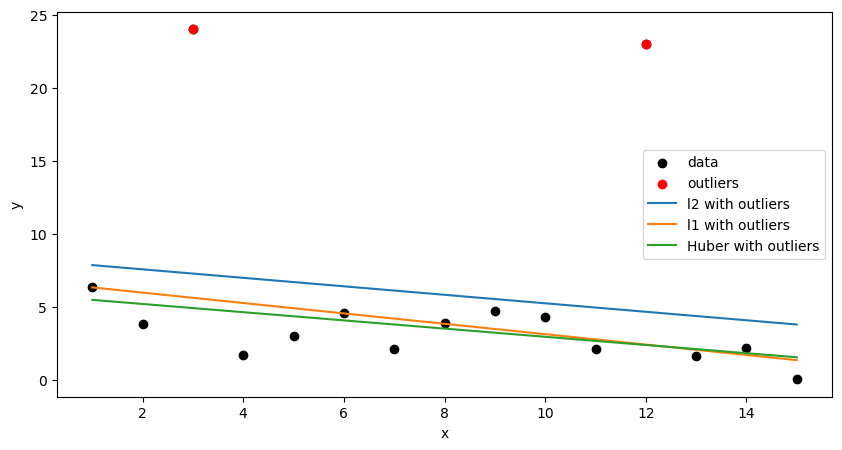

In [11]:
# Make all the plots

# fill in random numbers - replace with the values of  (a,b) found in parts (a), (b), and (c)
# a1,  a3, a5,  b1, b3, b5 = rand(1,6);

using PyPlot
figure(figsize = (10,5))
scatter(x,y,label="data",color = "black")
scatter([x[3],x[12]],[y[3],y[12]],label="outliers",color = "red") # outliers
plot(x, value(a1)*x .+ value(b1),label="l2 with outliers")
plot(x, value(a3)*x .+ value(b3),label="l1 with outliers")
plot(x, value(a5)*x .+ value(b5),label="Huber with outliers")
legend(loc ="best")
ylabel("y")
xlabel("x")
;

#### 2b written answer:
The L1 model handles the outliers better than the L2 model. The L2 model gets pulled up towards the outliers and travels less through the mass of non-outliers than the L1 model.

This is the case because in L2 the residuals are squared which means that outliers with large errors have really large pulls whereas in L1 the residuals are taken as is which means it is pulled less.

#### 2d written answer:
The huber model gives the best fit to the non-outlier data as shown on the plot above

## 3. Heat pipe design

### Part A
The following three images show me working through the geometric problem and converting it to a convex problem

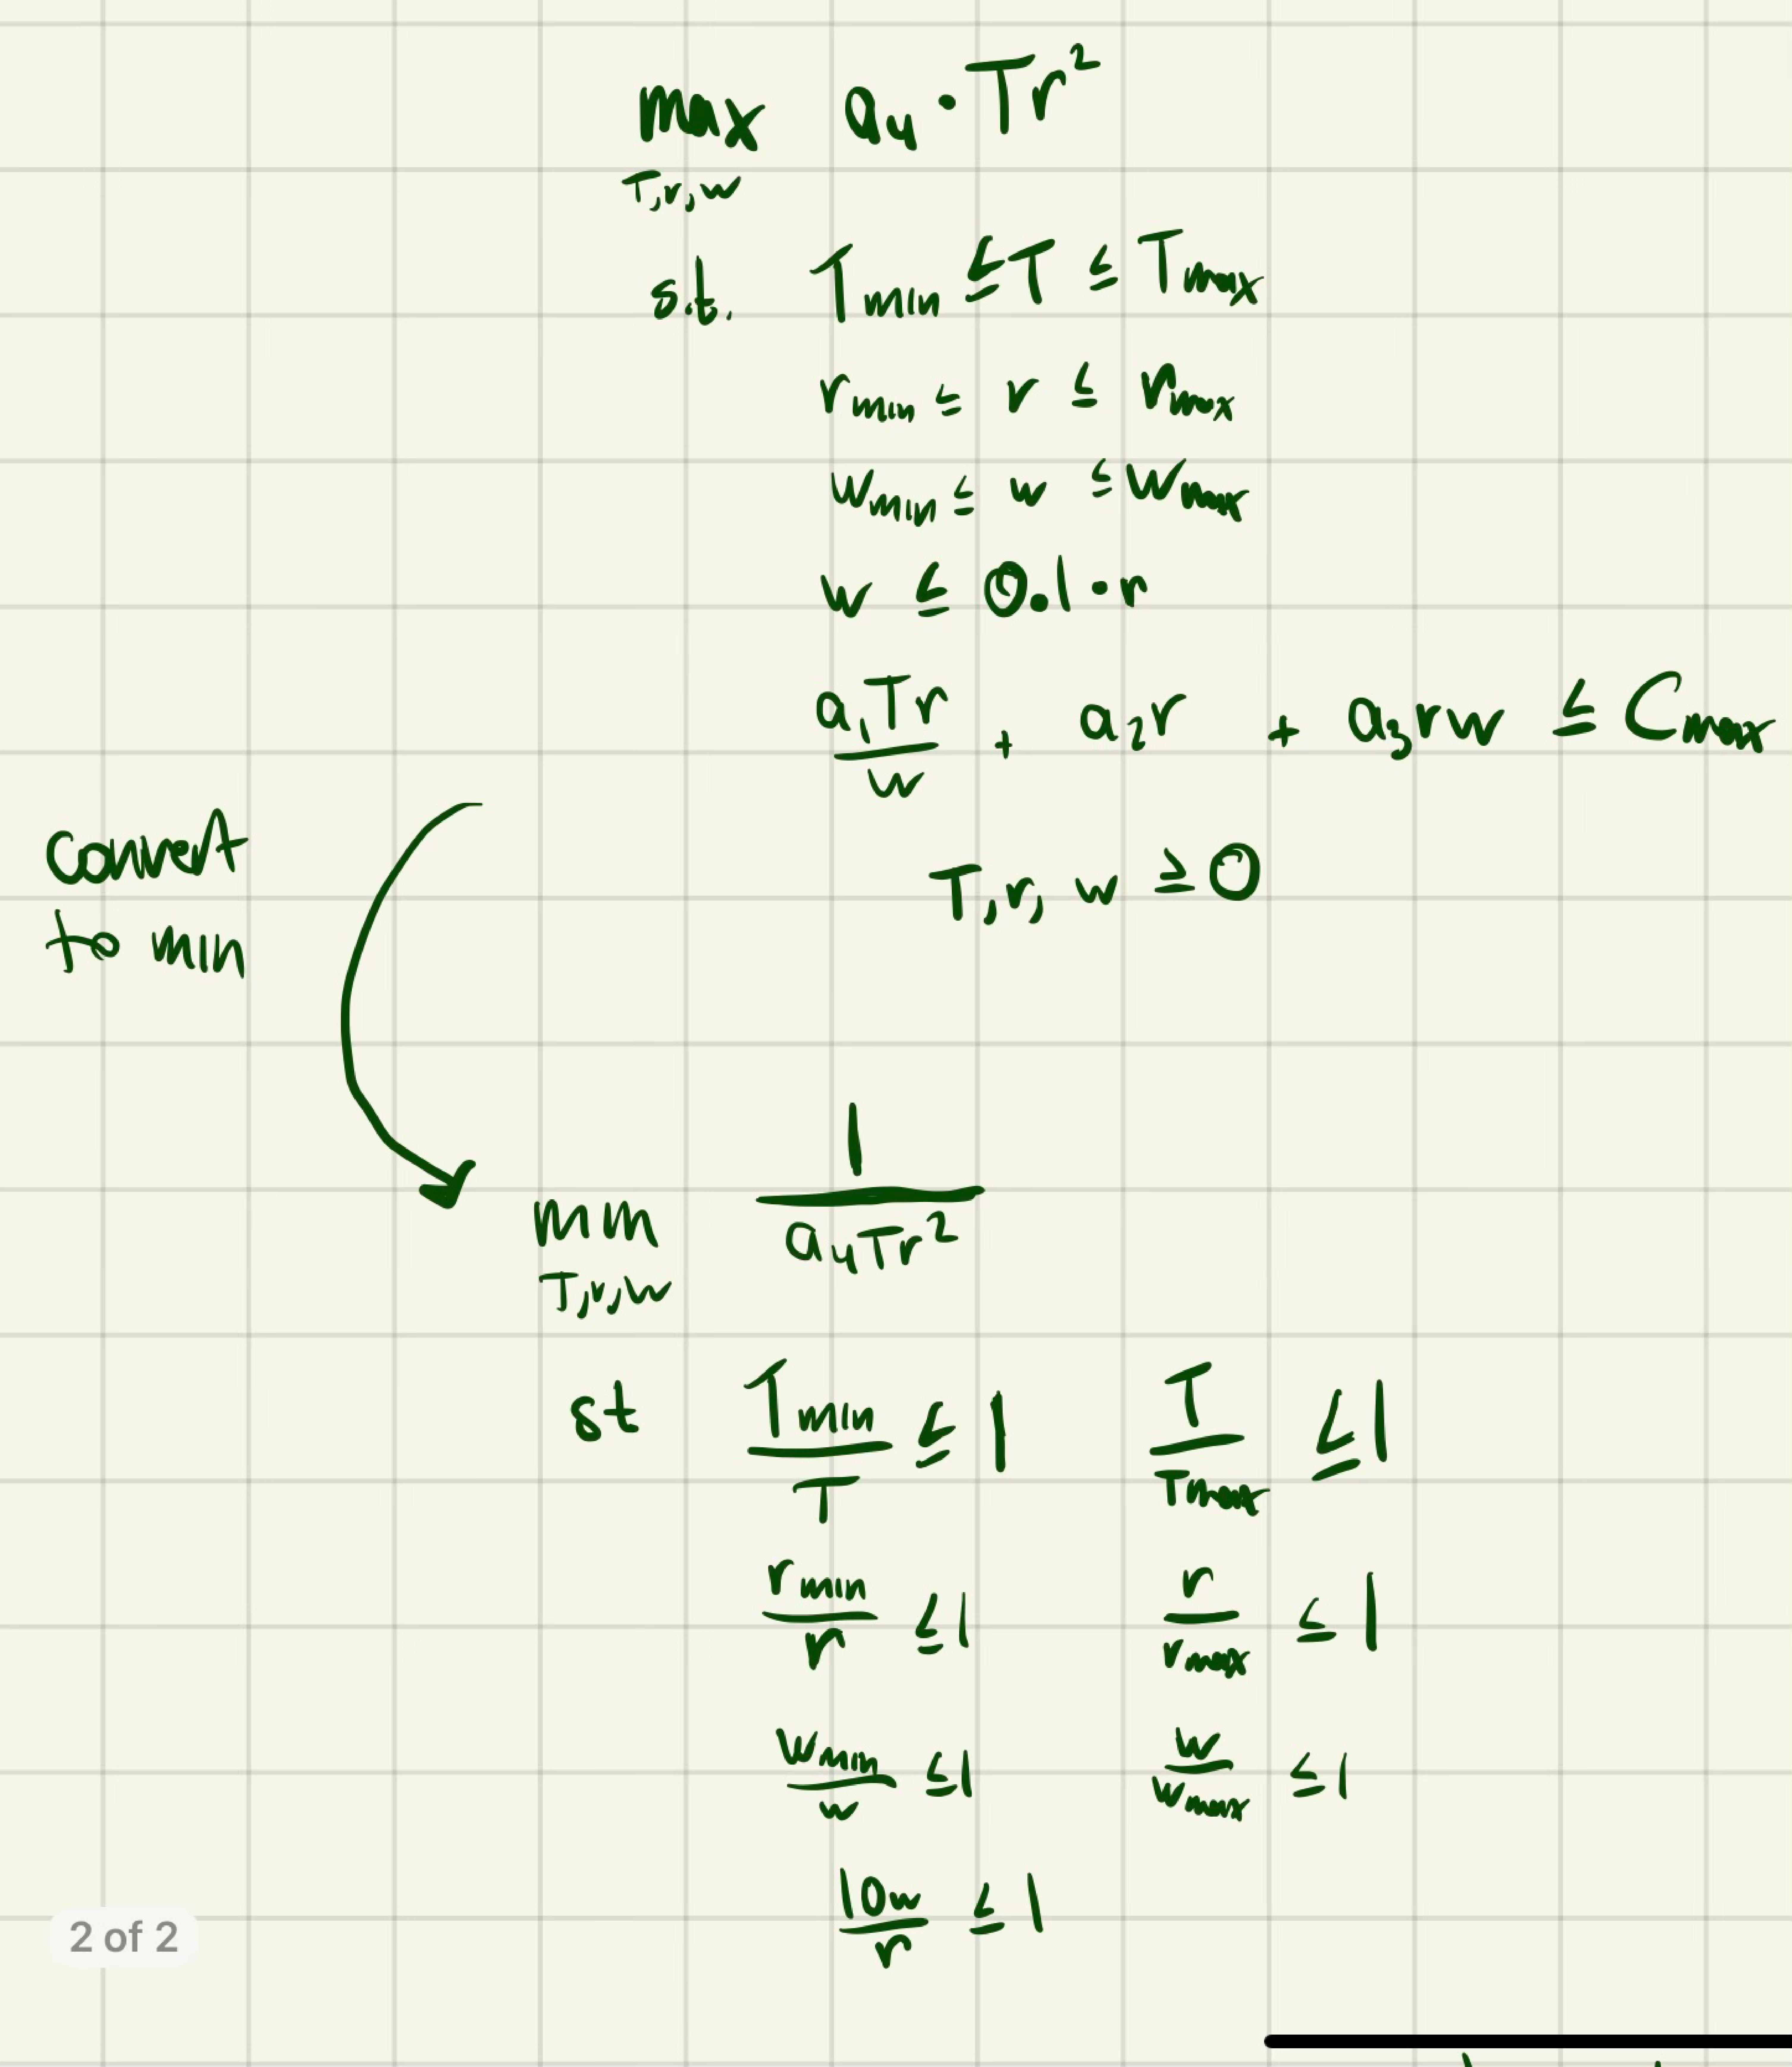

### Part B

In [12]:
using JuMP, Ipopt
model = Model(Ipopt.Optimizer)

Cmax = 500
alpha = ones(4)

# x = log(T)
# y = log(r)
# z = log(w)

@variable(model, x >= 0)
@variable(model, y >= 0)
@variable(model, z >= 0)

@NLconstraint(model, log(10) <= y - z)
@NLconstraint(model, log( exp(log(alpha[1]/Cmax)+x+y-z) + exp(log(alpha[2]/Cmax) + y) + exp(log(alpha[3]/Cmax) + y + z) ) <= 0)

@objective(model, Min, log(alpha[4]) - x - 2y)
optimize!(model)

println("\nObjective Value: ", -1*objective_value(model))
println("Value of T: ", exp(value(x)))
println("Value of r: ", exp(value(y)))
println("Value of w: ", exp(value(z)))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality co